In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import scipy.stats as st

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


1. Чему равен коэффициент корреляции в данной выборке (попробуйте построить график для нахождения верного ответа):

In [2]:
data = {'X': [4, 5, 2, 3, 1], 
        'Y': [2, 1, 4, 3, 5]}

df = pd.DataFrame(data)
df

,X,Y
0,4,2
1,5,1
2,2,4
3,3,3
4,1,5


In [3]:
pg.pairwise_corr(df, method='spearman')#, alternative='greater', padjust='bonf')

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,X,Y,spearman,two-sided,5,-1.0,"[-1.0, -1.0]",1.404265e-24,1.0


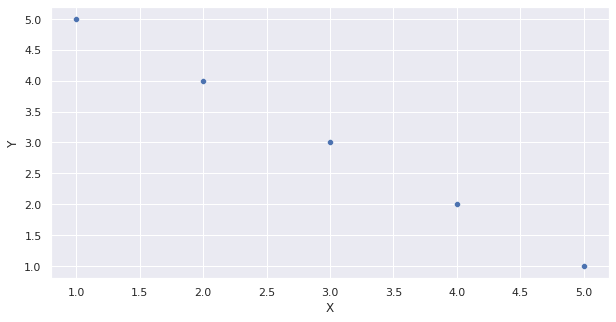

In [5]:
sns.set(rc={'figure.figsize' : (10,5)}) 

sns.scatterplot(x = 'X', y = 'Y', data = df)

In [6]:
st.pearsonr(df.X, df.Y) 


(-1.0, 0.0)

In [7]:
st.spearmanr(df.X, df.Y)


SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24)

In [8]:
st.kendalltau(df.X, df.Y)

KendalltauResult(correlation=-0.9999999999999999, pvalue=0.016666666666666666)

In [9]:
pg.pairwise_corr(df, columns=['X', 'Y'])

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,X,Y,pearson,two-sided,5,-1.0,"[-1.0, -1.0]",0.0,inf,1.0


2. На графике изображена зависимость двух количественных переменных X и Y. Рассчитайте коэффициент b1 для регрессионной прямой, если коэффициент детерминации равен 0.25:

Среднее первой группы: 15

Дисперсия: 25


Среднее второй группы: 10

Дисперсия: 36

In [10]:
b1 = (np.sqrt(36)/np.sqrt(25))*np.sqrt(0.25)
b1

0.6

In [11]:
np.corrcoef(df.X, df.Y) 

array([[ 1., -1.],
       [-1.,  1.]])

In [12]:
df.corr()

,X,Y
X,1.0,-1.0
Y,-1.0,1.0
